List of required package for the assignment

In [0]:
# For downloading stock data
import pandas_datareader.data as web
import datetime
from itertools import islice

%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.lines as mlines
import cvxopt as opt  
from cvxopt import blas, solvers  
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import nnls 

solvers.options['show_progress'] = False  

A complete list of stock returns alongside with dates must be stored in order for the dataframe to be installed and ran. The following code requires online access, and each question will output a csv or png file into the local files directory. It is advised to check the files directory before proceeding to run the entire code.

In [0]:
# #Setting initial datetime and final datetime
# start = datetime.datetime(2009, 12, 27)
# end = datetime.datetime(2019, 9, 30)
 
# #Get data from yahoo finance
# stockName = "J69U.SI"
# df = web.get_data_yahoo(stockName, start, end , interval = 'w')

# # Initiate Rest of stocks to be appended
# stockList = ["H15.SI", "S41.SI", "H17.SI", "S68.SI", "558.SI", "B16.SI", 
#              "EB5.SI", "F99.SI", "U10.SI", "CC3.SI","C52.SI", "5IG.SI", "S51.SI",
#              "K71U.SI","S08.SI", "U9E.SI","F34.SI","G41.SI", "A7RU.SI"]
# # Resetting the date columns to be a column rather than an index
# dfS = pd.DataFrame(df["Adj Close"],df.index)
# dfS.reset_index(level =['Date'], inplace = True)

# dfS = dfS[["Date","Adj Close"]]
# dfS.rename(columns = {'Adj Close':stockName}, inplace = True)
# # To download the list of stocks from yahoo finance
# for i in stockList:
#     df = web.get_data_yahoo(i, start, end , interval = 'w')
#     dfNew = pd.DataFrame(df["Adj Close"],df.index)
#     dfNew.reset_index(level =['Date'], inplace = True)

#     dfNew = dfNew[["Date","Adj Close"]]
#     dfNew.rename(columns = {'Adj Close':i}, inplace = True)
#     dfS = pd.merge(dfS,dfNew, on ="Date")
# # Saving the csv file with all stocks
# dfS.to_csv("Allstocks.csv", index = False)

Re-input the stock data into python

README
If in any case the github link below fails to open, please use the google drive link below and uncomment the two lines.
https://drive.google.com/drive/folders/1BjYvU_5q3GnfzvmEIGzGaRsDrneP84WM?usp=sharing

In [0]:
# dfStock = pd.read_csv("Allstocks (1).csv")
# dfOtherRates = pd.read_csv("nonstockRates.csv")
dfStock = pd.read_csv("https://raw.githubusercontent.com/alexzhu1998/actl3182assignment/4346b5b6761baaba7e0ea948764f521a4dc7b886/Allstocks%20(1).csv")
dfOtherRates = pd.read_csv("https://raw.githubusercontent.com/alexzhu1998/actl3182assignment/13ef55cc54c6e175b7fe04d8e184fcdedb7acdeb/nonstockRates.csv")


dfStock['Date'] = pd.to_datetime(dfStock['Date'], format='%Y-%m-%d')
dfOtherRates['Date'] = dfStock['Date']
dfStock.set_index('Date',inplace = True)
dfOtherRates.set_index('Date',inplace = True)

real_estate = ["U14.SI", "J69U.SI", "EH5.SI", "C31.SI", "H30.SI"]

Q1 To approach Q1, we will first compute the log returns by using log properties, that $$r_{t} = \ln(P_{t+1})- \ln(P_{t}).$$ 
And then after omitting the first row of NaN values, we will plot the 20 stocks return on the same graph.

In [0]:
# Computing Log returns
returns_weekly = np.log(dfStock)-np.log(dfStock).shift(1)
returns_weekly.shape

(510, 20)

In [0]:
# Omitting first row
returns_weekly = returns_weekly.iloc[1:]
cum_returns_weekly = returns_weekly.cumsum()
cum_returns_weeklydf = pd.DataFrame(cum_returns_weekly)
cum_returns_weeklydf

,558.SI,BTJ.SI,C31.SI,C52.SI,CC3.SI,E28.SI,EB5.SI,EH5.SI,F34.SI,F99.SI,G13.SI,H17.SI,H30.SI,J69U.SI,O39.SI,S41.SI,S68.SI,U14.SI,U9E.SI,V01.SI
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.028982,0.207639,0.009479,-0.006117,-0.009346,0.063181,0.159373,0.077558,0.070547,0.048790,-0.047253,0.033901,0.029215,0.021197,-0.021100,-0.028894,0.014389,0.000000,0.074117,0.108566
2010-01-11,0.084541,0.268264,0.018868,-0.006117,0.004640,0.063181,0.228366,0.149532,0.100528,0.066768,-0.039221,0.027211,0.105364,0.000000,-0.033522,-0.019170,0.007220,0.002454,0.570553,0.070826
2010-01-18,0.028982,0.207639,-0.031441,0.000000,0.000000,-0.021978,0.159373,0.121363,0.035145,0.018868,-0.063513,-0.006921,0.057583,0.021197,-0.074108,-0.032157,-0.010930,-0.029927,0.570553,0.049227
2010-01-25,0.000000,0.143101,-0.084417,-0.030963,0.009259,-0.067437,0.123005,0.077558,0.024579,-0.009569,-0.204096,-0.049481,-0.037742,-0.043807,-0.105360,-0.048632,-0.035653,-0.084558,0.526096,0.062242
2010-02-01,0.000000,0.143101,-0.143101,-0.069429,-0.009346,-0.090973,0.065847,0.149532,-0.051048,-0.092219,-0.158004,-0.035093,-0.084980,-0.081832,-0.117645,-0.075569,-0.075224,-0.095310,0.268278,0.112673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-02,2.878202,-1.357141,0.085484,0.799247,0.111357,1.357124,0.624453,1.748609,-0.305677,-0.046497,-0.225319,0.860430,0.578206,1.212210,0.576858,0.240867,0.385329,0.828008,-0.431534,1.579990
2019-09-09,2.917732,-1.332448,0.104957,0.783247,0.149097,1.446736,0.687806,1.748609,-0.305677,-0.017509,-0.225319,0.919024,0.578206,1.190231,0.599638,0.244721,0.395923,0.838647,-0.379431,1.597885
2019-09-16,2.878202,-1.332448,0.077022,0.766986,0.111357,1.432347,0.706734,1.755727,-0.321343,-0.029004,-0.202972,0.860430,0.554109,1.201281,0.586032,0.248560,0.391229,0.826671,-0.426684,1.601969


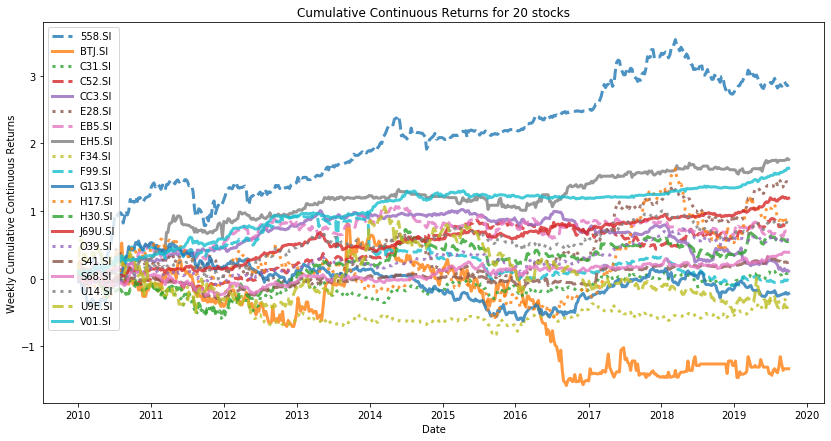

In [0]:
# The output of the graph is saved as Q1.png, when using Google Colab, 
# please refresh and open the directory on the left in the arrow and "Files"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize = (14,7))
i = 0
style = ['--', '-', ":"]
for c in returns_weekly.columns.values:
    plt.plot(cum_returns_weekly.index,cum_returns_weekly[c], lw = 3,
             linestyle = style[i%3], alpha =0.8, label = c)
    i = i+1
plt.legend(loc = 'upper left', fontsize = 10)
plt.ylabel('Weekly Cumulative Continuous Returns')
plt.xlabel('Date')
plt.title('Cumulative Continuous Returns for 20 stocks')
plt.show()
plt.close()

Q2 

We are given 510 prices, $ P_{1}, P_{2}, ... , P_{510}$

To calculate Weekly Force of interest ($\delta^w$), we need to make the following calculation
$$\ln \frac{P_{i}}{P_{i-1}} = \delta^w_{i}$$ where $i = 2,...,510$

Thus, we will remove $\delta^w_{1}$, since it has no previous price.

Next, to calculate annual force of interest over the 10 years, consider the following equation 

$$\overline{\delta^{w}} = \sum_{i=2}^{510}\frac{1}{509}\delta^w_{i}$$

$$\delta^{a} = 52\overline{\delta^{w}}$$

Note we cannot use the formula previously because we are taking the average over the 10 years period, but for covariance, we can use
\begin{align*}
\delta^{a} &= \sum_{i=1}^{52}\delta_{i}^{w}\\
\text{Var}(\delta^{a}) &= \sum_{i=1}^{52}\text{Var}(\delta_{i}^{w}) \tag{iid force of interest}\\
\text{Var}(\delta^{a}) &= \sum_{i=1}^{52}\text{Var}(\delta^{w})\\
\text{Var}(\delta^{a}) &= 52\text{Var}(\delta^{w})
\end{align*}

Furthermore, the covariance between stock $x$ and $y$ is given by

\begin{align*}
Cov(\delta^{a}_{x},\delta^{a}_{y}) &= \rho\sqrt{\text{Var}(\delta^{a}_{x})}\sqrt{\text{Var}(\delta^{a}_{y})}\\
&= \rho\sqrt{52\text{Var}(\delta^{w}_{x})}\sqrt{52\text{Var}(\delta^{w}_{y})}\\
&= 52\rho\sqrt{\text{Var}(\delta^{w}_{x})}\sqrt{\text{Var}(\delta^{w}_{y})}\\
&= 52Cov(\delta^{w}_{x},\delta^{w}_{y})
\end{align*}


In [0]:
annual_returns = (returns_weekly.mean())*52
annual_cov_matrix = (returns_weekly.cov())*52
annual_std_df = pd.DataFrame(np.sqrt(np.diagonal(np.asmatrix(annual_cov_matrix))),
                          annual_cov_matrix.columns)

annual_returns_df = pd.DataFrame(annual_returns)
annual_returns_df.columns = ["Annual Returns"]
annual_std_df.columns = ["Annual Standard deviation"]

In [0]:
q2 = pd.merge(annual_returns_df,annual_std_df, left_index= True, right_index=True)

In [0]:
print(q2)

         Annual Returns  Annual Standard deviation
558.SI         0.293213                   0.371016
BTJ.SI        -0.136124                   0.637200
C31.SI         0.008733                   0.217576
C52.SI         0.077092                   0.193629
CC3.SI         0.011376                   0.176615
E28.SI         0.145587                   0.364578
EB5.SI         0.073470                   0.271916
EH5.SI         0.180089                   0.255196
F34.SI        -0.033368                   0.214594
F99.SI        -0.002963                   0.341370
G13.SI        -0.022443                   0.270338
H17.SI         0.087902                   0.433062
H30.SI         0.056608                   0.259825
J69U.SI        0.121595                   0.145357
O39.SI         0.060242                   0.166718
S41.SI         0.024607                   0.138559
S68.SI         0.039968                   0.168704
U14.SI         0.084180                   0.202727
U9E.SI        -0.041956        

Q3,4 Both of these questions essentially follows the same steps, except Q4 has the additional graphing step. 

We wish to achieve the following:


*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on

1.   $$\boldsymbol{w}^{T}\boldsymbol{z} = \mu$$
2.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$

Which we will form a Lagrangian of

*   $$L = \frac{1}{2}\boldsymbol{w}^{T} \Sigma \boldsymbol{w} + \lambda(1-\boldsymbol{1}^{T}\boldsymbol{w})+ \gamma(\mu - \boldsymbol{z}^{T}\boldsymbol{w})$$

Using the knowledge from lecture slides, we will first obtain the following equations:


*   $$A = \boldsymbol{1}^{T}\Sigma^{-1}\boldsymbol{1}$$
*   $$B = \boldsymbol{1}^{T}\Sigma^{-1}\boldsymbol{z}$$
*   $$C = \boldsymbol{z}^{T}\Sigma^{-1}\boldsymbol{z}$$
*   $$\Delta = AC - B^2$$










In [0]:
inv_matrix = pd.DataFrame(np.linalg.pinv(annual_cov_matrix.values), 
                          annual_cov_matrix.columns, annual_cov_matrix.index)
z = np.asmatrix(annual_returns)
inv = np.asmatrix(inv_matrix)
ones = np.asmatrix(np.ones(annual_returns.shape[0]))
covq3 = np.asmatrix(annual_cov_matrix)
A = np.dot(ones,np.dot(inv,ones.T)).item(0,0)
B = np.dot(z,np.dot(inv,ones.T)).item(0,0)
C = np.dot(z,np.dot(inv,z.T)).item(0,0)
delta = A*C - B**2

The solutions for the Lagrangian is given by 

*   $$\boldsymbol{w} = \lambda \Sigma^{-1}\boldsymbol{1} + \gamma \Sigma^{-1} \boldsymbol{z}$$
*   $$\lambda = \frac{C-\mu B}{\Delta}$$
*   $$\gamma = \frac{\mu A- B}{\Delta}$$



Q3 

In [0]:
mu_val = 0.12
lambda_val = (C-mu_val*B) / delta
gamma_val = (mu_val*A - B) / delta
weightsQ3 = lambda_val*np.dot(inv,ones.T) + gamma_val*np.dot(inv,z.T)
returns_check = np.dot(weightsQ3.T,annual_returns)
weightsQ3 = pd.DataFrame(weightsQ3,annual_returns_df.index)
weightsQ3.columns = ["Weights"]
# print(returns_check.item(0,0))
print("Weights short sale allowed")
print(weightsQ3)

Weights short sale allowed
          Weights
558.SI   0.010130
BTJ.SI   0.002241
C31.SI  -0.071130
C52.SI   0.042291
CC3.SI   0.110870
E28.SI   0.011267
EB5.SI   0.004224
EH5.SI   0.082065
F34.SI   0.011698
F99.SI   0.010902
G13.SI  -0.021866
H17.SI  -0.003302
H30.SI  -0.059675
J69U.SI  0.234413
O39.SI   0.018922
S41.SI   0.185118
S68.SI   0.030782
U14.SI   0.049930
U9E.SI  -0.009851
V01.SI   0.360972


Q4

In [0]:
def minVarianceLoopFunc(A,B,C,delta,inv,start, end,trials) :
    # Defining the set of mu value to loop through to create graph
    mu_list = np.linspace(start,end,num = trials)
    w_vec = [[] for _ in range(trials)]
    lambda_vec = []
    gamma_vec = []
    sigma_vec = []
    i = 0
    # For each value of mu, the loop will concatenate the new weights into a stored
    # weight vector array
    for mu_val in mu_list:
        lambda_val = (C-mu_val*B)/delta
        gamma_val = (mu_val*A - B)/delta
        w_val = lambda_val*np.dot(inv,ones.T) + gamma_val*np.dot(inv,z.T)
        sigma_val = np.sqrt(lambda_val+gamma_val*mu_val)
        w_vec[i] = np.append(w_vec[i], w_val)
        lambda_vec = np.append(lambda_vec, lambda_val)
        gamma_vec = np.append(gamma_vec, gamma_val)
        sigma_vec = np.append(sigma_vec, sigma_val)
        i = i + 1 
    # Merging the weights, gamma and lambda into one dataframe
    combinedf = pd.DataFrame(w_vec, index =  mu_list, columns = annual_returns_df.index)
    lambda_dfp1 = pd.DataFrame(lambda_vec,index = mu_list)
    gamma_dfp1 = pd.DataFrame(gamma_vec,index = mu_list)
    sigma_dfp1 = pd.DataFrame(sigma_vec,index = mu_list)
    combinedf = pd.merge(combinedf,lambda_dfp1, left_index= True, right_index=True)
    combinedf = pd.merge(combinedf,gamma_dfp1, left_index= True,right_index=True)
    combinedf = pd.merge(combinedf,sigma_dfp1, left_index= True,right_index=True)

    # Converting into dataframe format and rearranging the columns to make lambda 
    # and gamma in front
    combinedf.rename(columns={ combinedf.columns[-3]: "lambda" }, inplace = True)
    combinedf.rename(columns={ combinedf.columns[-2]: "gamma" }, inplace = True)
    combinedf.rename(columns={ combinedf.columns[-1]: "sigma" }, inplace = True)

    cols = combinedf.columns.tolist()
    cols = cols[-3:] + cols[:-3]
    combinedf = combinedf[cols]
    combinedf.index.names = ['mu']
    return combinedf

In [0]:
pt1ssAllowed = minVarianceLoopFunc(A,B,C,delta,inv,-0.4, 0.4,33)

In [0]:
# Display the dataframe
pt1ssAllowed.head(5)

,lambda,gamma,sigma,558.SI,BTJ.SI,C31.SI,C52.SI,CC3.SI,E28.SI,EB5.SI,EH5.SI,F34.SI,F99.SI,G13.SI,H17.SI,H30.SI,J69U.SI,O39.SI,S41.SI,S68.SI,U14.SI,U9E.SI,V01.SI
mu,,,,,,,,,,,,,,,,,,,,,,,
-0.400,0.024563,-0.199280,0.322916,-0.498803,0.111015,0.256052,0.027104,0.683272,-0.082776,-0.131710,-0.300811,0.485303,0.218225,0.335458,0.098250,0.062198,-0.159578,-0.010286,0.979335,0.094749,-0.411968,0.046721,-0.80175
-0.375,0.023623,-0.189175,0.307512,-0.474335,0.105785,0.240322,0.027834,0.655752,-0.078254,-0.125175,-0.282404,0.462533,0.208257,0.318279,0.093368,0.056338,-0.140636,-0.008882,0.941152,0.091674,-0.389761,0.044001,-0.74585
-0.350,0.022683,-0.179070,0.292160,-0.449867,0.100556,0.224592,0.028564,0.628233,-0.073733,-0.118639,-0.263996,0.439764,0.198290,0.301100,0.088486,0.050479,-0.121694,-0.007477,0.902968,0.088598,-0.367555,0.041282,-0.68995
-0.325,0.021743,-0.168965,0.276869,-0.425400,0.095326,0.208862,0.029295,0.600714,-0.069212,-0.112104,-0.245589,0.416994,0.188322,0.283921,0.083603,0.044620,-0.102752,-0.006073,0.864785,0.085523,-0.345348,0.038562,-0.63405
-0.300,0.020803,-0.158860,0.261650,-0.400932,0.090097,0.193132,0.030025,0.573194,-0.064690,-0.105569,-0.227181,0.394225,0.178355,0.266742,0.078721,0.038760,-0.083810,-0.004669,0.826601,0.082448,-0.323141,0.035842,-0.57815


Q4,5 Plotting both min variance portfolio and individual stocks onto the risk vs expected return space. In the graph, we can see that no stocks are mean-variance efficient, since none of the stocks lie on the frontier.

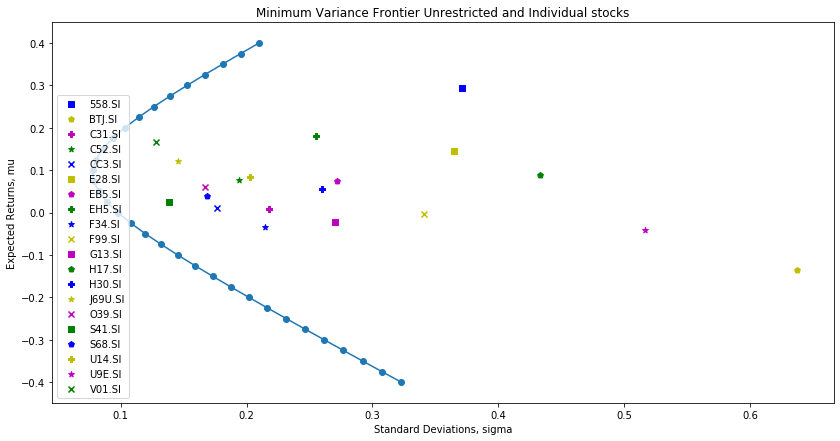

In [0]:
# Plotting the graph and saved as Q4,5.png
y = annual_returns_df["Annual Returns"]
z = annual_std_df["Annual Standard deviation"]
n = annual_returns_df.index

plt.figure(figsize = (14,7))
plt.scatter(pt1ssAllowed["sigma"],pt1ssAllowed.index)
plt.plot(pt1ssAllowed["sigma"], pt1ssAllowed.index)

marker = ["s", "p", "P" , "*", "x"]
colours = ['b', 'y', 'm', 'g']

a = [(n[0])]
for i in range (1,len(n)):
    a.append((n[i]))
a = tuple(a)

b = [(plt.scatter(z[0],y[0], marker = marker[0], color = colours[0]))]
for i in range(1,len(n)):
    b.append((plt.scatter(z[i],y[i], marker = marker[i%5], color = colours[i%4])))
b = tuple(b)

plt.legend(b, a, loc = 'lower left')

plt.ylabel('Expected Returns, mu')
plt.xlabel('Standard Deviations, sigma')
plt.title('Minimum Variance Frontier Unrestricted and Individual stocks')
plt.show()
plt.close()

Q6 The expected return and variance of the absolute minimum variance portfolio is given by

*   $$\mu_{MVP} = \frac{B}{A}$$
*   $$\sigma_{MVP} = \frac{1}{\sqrt{A}}$$

Combining with the previous formula for A,B,C,$\Delta$, 
*   $$A = \boldsymbol{1}^{T}\Sigma^{-1}\boldsymbol{1}$$
*   $$B = \boldsymbol{1}^{T}\Sigma^{-1}\boldsymbol{z}$$
*   $$C = \boldsymbol{z}^{T}\Sigma^{-1}\boldsymbol{z}$$
*   $$\Delta = AC - B^2$$

We can computer the weights vectors and 
*   $$\boldsymbol{w} = \lambda \Sigma^{-1}\boldsymbol{1} + \gamma \Sigma^{-1} \boldsymbol{z}$$
*   $$\lambda = \frac{C-\mu_{MVP} B}{\Delta}$$
*   $$\gamma = \frac{\mu_{MVP} A- B}{\Delta}$$


MVP Weights
          Weights
558.SI  -0.016275
BTJ.SI   0.007884
C31.SI  -0.054155
C52.SI   0.041503
CC3.SI   0.140567
E28.SI   0.006388
EB5.SI  -0.002828
EH5.SI   0.062201
F34.SI   0.036270
F99.SI   0.021659
G13.SI  -0.003327
H17.SI   0.001967
H30.SI  -0.053352
J69U.SI  0.213972
O39.SI   0.017407
S41.SI   0.226324
S68.SI   0.034100
U14.SI   0.025965
U9E.SI  -0.006916
V01.SI   0.300647


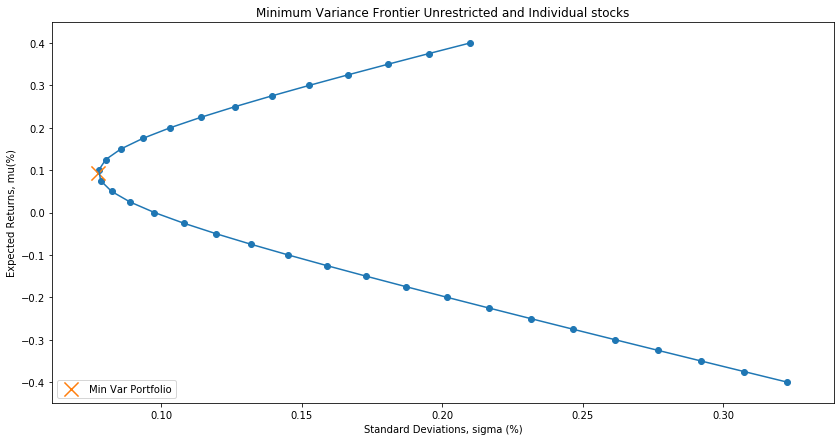

In [0]:
mu_mvp = B/A
sigma_mvp = 1/np.sqrt(A)
lambda_val = 1/A
w_mvp = lambda_val*np.dot(inv,ones.T) 
w_mvp = pd.DataFrame(w_mvp,index = annual_returns_df.index)
w_mvp.columns = ["Weights"]
print("MVP Weights")
print(w_mvp)

# Plotting the graph and checking if Minimum Variance Portfolio lies on the efficient frontier
y = annual_returns_df["Annual Returns"]
z = annual_std_df["Annual Standard deviation"]
n = annual_returns_df.index

plt.figure(figsize = (14,7))
plt.scatter(pt1ssAllowed["sigma"],pt1ssAllowed.index)
plt.plot(pt1ssAllowed["sigma"], pt1ssAllowed.index)
mvp = plt.scatter(sigma_mvp,mu_mvp, marker = 'x', s = 200)
MVPtuple1 = [mvp]
MVPtuple1 = tuple(MVPtuple1)
MVPtuple2 = [("Min Var Portfolio")]
MVPtuple2 = tuple(MVPtuple2)
plt.legend(MVPtuple1, MVPtuple2, loc = 'lower left')
plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted and Individual stocks')
plt.show()
plt.close()

Q7 Equally weighted portfolio does indeed lie inside the Minimum Variance Frontier

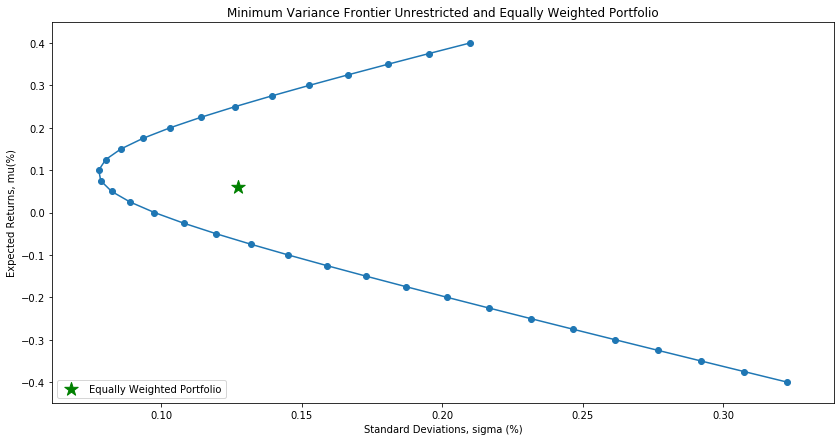

In [0]:
arr = [0.05]
w_equallyweighted = np.asmatrix(np.tile(arr,20))
z = np.asmatrix(annual_returns)
covq7 = np.asmatrix(annual_cov_matrix)

mu_equallyweighted = np.dot(w_equallyweighted,z.T).item(0,0)
sigma_equallyweighted = np.sqrt(np.dot(w_equallyweighted,np.dot(covq7,w_equallyweighted.T))).item(0,0)

# Plotting the location for an equally weighted portfolio
plt.figure(figsize = (14,7))
plt.scatter(pt1ssAllowed["sigma"],pt1ssAllowed.index)
plt.plot(pt1ssAllowed["sigma"], pt1ssAllowed.index)
mvp = plt.scatter(sigma_equallyweighted,mu_equallyweighted, marker = '*', c = 'g', s = 200)
MVPtuple1 = [mvp]
MVPtuple1 = tuple(MVPtuple1)
MVPtuple2 = [("Equally Weighted Portfolio")]
MVPtuple2 = tuple(MVPtuple2)
plt.legend(MVPtuple1, MVPtuple2, loc = 'lower left')
plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted and Equally Weighted Portfolio')
plt.show()
plt.close()

Q8

In [0]:
# Reading and modifying data
ausStock = dfOtherRates.copy()

In [0]:
ausStock.rename(columns = {'S&PAUX200': "AUD Price"}, inplace = True)
ausStock["SGD Price"] = ausStock["AUD Price"] *ausStock["SGDAUD"]
ausStock = ausStock["SGD Price"]

In [0]:
ausStock_returns = np.log(ausStock)-np.log(ausStock).shift(1)

In [0]:
ausStock_returns = ausStock_returns.iloc[1:]

In [0]:
print("Weekly Return of Australian Stock")
print(ausStock_returns)

Weekly Return of Australian Stock
Date
2010-01-04    0.034638
2010-01-11    0.024873
2010-01-18   -0.001300
2010-01-25   -0.042812
2010-02-01   -0.056442
                ...   
2019-09-02    0.008790
2019-09-09    0.018593
2019-09-16    0.002489
2019-09-23   -0.004480
2019-09-30    0.000325
Name: SGD Price, Length: 509, dtype: float64


In [0]:
annual_ausStock_returns = (ausStock_returns.mean())*52
annual_ausStock_std = np.sqrt(ausStock_returns.var()*52)

In [0]:
q8 = q2.copy()
q8.loc['AUS'] = [annual_ausStock_returns,annual_ausStock_std]

In [0]:
print("Weights q8")
print(q8)

Weights q8
         Annual Returns  Annual Standard deviation
558.SI         0.293213                   0.371016
BTJ.SI        -0.136124                   0.637200
C31.SI         0.008733                   0.217576
C52.SI         0.077092                   0.193629
CC3.SI         0.011376                   0.176615
E28.SI         0.145587                   0.364578
EB5.SI         0.073470                   0.271916
EH5.SI         0.180089                   0.255196
F34.SI        -0.033368                   0.214594
F99.SI        -0.002963                   0.341370
G13.SI        -0.022443                   0.270338
H17.SI         0.087902                   0.433062
H30.SI         0.056608                   0.259825
J69U.SI        0.121595                   0.145357
O39.SI         0.060242                   0.166718
S41.SI         0.024607                   0.138559
S68.SI         0.039968                   0.168704
U14.SI         0.084180                   0.202727
U9E.SI        -0.041

Q9

In [0]:
returns_weeklyq9 = returns_weekly.copy()
returns_weeklyq9.reset_index(drop=True, inplace=True)
ausStock_returns.reset_index(drop=True, inplace=True)

returns_weeklyq9 = pd.concat([returns_weeklyq9,ausStock_returns], axis = 1)
returns_weeklyq9.rename(columns = {'SGD Price': "AUD Stock"}, inplace = True)
returns_weeklyq9.index = returns_weekly.index

In [0]:
# Essentially the same idea of code as Q7
annual_returns = (returns_weeklyq9.mean())*52
annual_cov_matrix = returns_weeklyq9.cov()*52 
annual_std_df = pd.DataFrame(np.sqrt(np.diagonal(np.asmatrix(annual_cov_matrix))),
                          annual_cov_matrix.columns)

annual_returns_df = pd.DataFrame(annual_returns)
annual_returns_df.columns = ["Annual Returns"]
annual_std_df.columns = ["Annual Standard deviation"]

inv_matrix = pd.DataFrame(np.linalg.pinv(annual_cov_matrix.values), 
                          annual_cov_matrix.columns, annual_cov_matrix.index)
z = np.asmatrix(annual_returns)
inv = np.asmatrix(inv_matrix)
ones = np.asmatrix(np.ones(annual_returns.shape[0]))
covq9 = np.asmatrix(annual_cov_matrix)
A = np.dot(ones,np.dot(inv,ones.T)).item(0,0)
B = np.dot(z,np.dot(inv,ones.T)).item(0,0)
C = np.dot(z,np.dot(inv,z.T)).item(0,0)
delta = A*C - B**2

mu_val = 0.12
lambda_val = (C-mu_val*B) / delta
gamma_val = (mu_val*A - B) / delta
weightsQ9 = lambda_val*np.dot(inv,ones.T) + gamma_val*np.dot(inv,z.T)
returns_check = np.dot(weightsQ9.T,annual_returns)
weightsQ9 = pd.DataFrame(weightsQ9,annual_returns_df.index)
weightsQ9.columns = ["Weights"]
# print(returns_check.item(0,0))
print("Weights q9")
print(weightsQ9)

0.11999999999999998
Weights q9
            Weights
558.SI     0.017671
BTJ.SI    -0.001088
C31.SI    -0.069598
C52.SI     0.040002
CC3.SI     0.085238
E28.SI     0.009521
EB5.SI     0.006490
EH5.SI     0.078249
F34.SI    -0.001558
F99.SI     0.002445
G13.SI    -0.019885
H17.SI    -0.009774
H30.SI    -0.062371
J69U.SI    0.218558
O39.SI     0.032249
S41.SI     0.142351
S68.SI     0.019787
U14.SI     0.055867
U9E.SI    -0.014688
V01.SI     0.361962
AUD Stock  0.108570


In [0]:
sigmaWithoutAus = np.sqrt(np.dot(np.asmatrix(weightsQ3).T,np.dot(covq3,np.asmatrix(weightsQ3))).item(0,0))
sigmaWithAus = np.sqrt(np.dot(np.asmatrix(weightsQ9).T,np.dot(covq9,np.asmatrix(weightsQ9))).item(0,0))
print("Risk eliminated is given by", sigmaWithoutAus ,"-", sigmaWithAus, "=" ,sigmaWithoutAus - sigmaWithAus)

Risk eliminated is given by 0.07949770927705975 - 0.07697068387857178 = 0.002527025398487967


Q10

In [0]:
pt2ssAllowed = minVarianceLoopFunc(A,B,C,delta,inv,-0.4,0.4, 33)

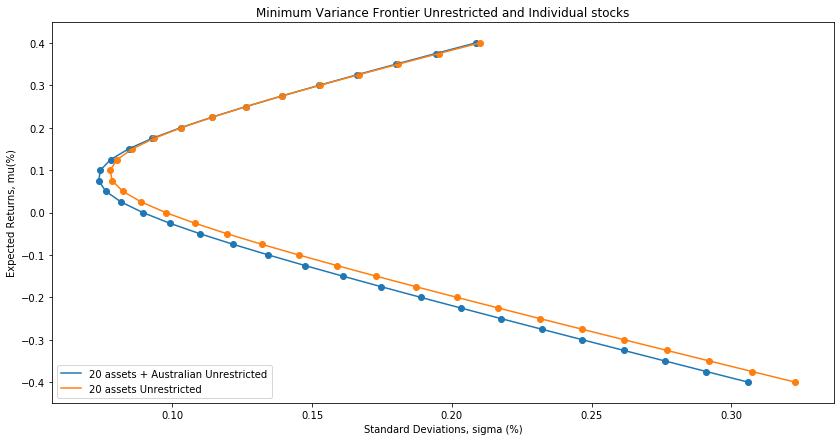

In [0]:
# Plotting the graph and saved as Q10.png
y = annual_returns_df["Annual Returns"]
z = annual_std_df["Annual Standard deviation"]
n = annual_returns_df.index

plt.figure(figsize = (14,7))
plt.scatter(pt2ssAllowed["sigma"],pt2ssAllowed.index)
plt.plot(pt2ssAllowed["sigma"], pt2ssAllowed.index, label = "20 assets + Australian Unrestricted")
plt.scatter(pt1ssAllowed["sigma"],pt1ssAllowed.index)
plt.plot(pt1ssAllowed["sigma"], pt1ssAllowed.index, label = "20 assets Unrestricted")

plt.legend(loc = 'lower left')
plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted and Individual stocks')
plt.show()
plt.close()

Q11 Using solver for the constraint optimisation problem

We wish to achieve the following:


*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on

1.   $$\boldsymbol{w}^{T}\boldsymbol{z} = \mu$$
2.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$
3.   $$w_{aus} \leq 0.1$$

In [0]:
def solveWeights(bnds,cons3, ar,vcm, mu, array):
    z = np.asmatrix(ar)
    def objective(w,cov0 = vcm):
        return np.dot(w,np.dot(cov0,w.T)).item(0)
    # Defined the first constraint for restriction on weights
    def constraint1(w):
        return np.sum(w)-1
    # Defined the second constraint for restriction on mu
    def constraint2(w,mu0 = mu,z0 = np.asmatrix(ar)):
        return np.dot(w,z0.T).item(0,0) - mu0
    # Defined the third constraint for real estate stocks restrictions
    def constraint3(w):
        return np.sum(w[array])-0.25
    con1 = {'type' : 'eq', 'fun': constraint1}
    con2 = {'type' : 'eq', 'fun': constraint2}
    con3 = {'type' : 'eq', 'fun': constraint3}
    if cons3 == 0 and mu == 999:
        cons = [con1]
    elif cons3 == 0:
        cons = [con1,con2]
    elif mu == 999:
        cons = [con1,con3]
    else:
        cons = [con1,con2,con3]
    # set initial values for weights
    arr = [0.05]
    w0 = np.asmatrix(np.tile(arr,len(bnds)))
    return minimize(objective,w0,method = 'SLSQP', bounds = bnds, constraints = cons)

In [0]:
bnds = ((None,None),)*20 + ((None,0.1),)*1
w = solveWeights(bnds, 0, annual_returns,annual_cov_matrix,0.12,0)
weightsq11 = pd.DataFrame(w.x,annual_returns_df.index)
weightsq11.columns = ["Weights"]
print("Weights q11")
print(weightsq11)
print("Portfolio Standard Deviation")
print(np.sqrt(np.dot(np.asmatrix(weightsq11).T,np.dot(covq9,np.asmatrix(weightsq11))).item(0,0)))

Weights q11
            Weights
558.SI     0.015739
BTJ.SI    -0.000922
C31.SI    -0.073512
C52.SI     0.040264
CC3.SI     0.085666
E28.SI     0.009467
EB5.SI     0.007180
EH5.SI     0.078729
F34.SI    -0.000223
F99.SI     0.003712
G13.SI    -0.019079
H17.SI    -0.008428
H30.SI    -0.059616
J69U.SI    0.223203
O39.SI     0.032969
S41.SI     0.142286
S68.SI     0.024724
U14.SI     0.052808
U9E.SI    -0.015347
V01.SI     0.360379
AUD Stock  0.100000
Portfolio Standard Deviation
0.07699893943185275


Q12

We wish to achieve the following:


*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on

1.   $$\boldsymbol{w}^{T}\boldsymbol{z} = \mu$$
2.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$
3.   $$\sum_{i \in {\text{\{real estates\}}}} w_{i} \leq 0.25$$

In [0]:
annual_returns = (returns_weekly.mean())*52
annual_cov_matrix = (returns_weekly.cov())*52 

bnds = ((None,None),)*20
mu = 0.12

arr = [-1]*len(real_estate)
for i in range(len(real_estate)):
    arr[i] = list(annual_returns.index).index(real_estate[i])

w = solveWeights(bnds,1,annual_returns,annual_cov_matrix,mu, arr)
weightsq12 = pd.DataFrame(w.x,annual_cov_matrix.index)
weightsq12.columns = ["Weights"]
print("Weights q12")
print(weightsq12)

Weights q12
          Weights
558.SI   0.008292
BTJ.SI   0.001702
C31.SI  -0.069848
C52.SI   0.039552
CC3.SI   0.110377
E28.SI   0.011649
EB5.SI   0.004671
EH5.SI   0.083914
F34.SI   0.012603
F99.SI   0.011238
G13.SI  -0.022233
H17.SI  -0.003018
H30.SI  -0.057171
J69U.SI  0.241775
O39.SI   0.016862
S41.SI   0.182385
S68.SI   0.029159
U14.SI   0.051329
U9E.SI  -0.010219
V01.SI   0.356980


Q13

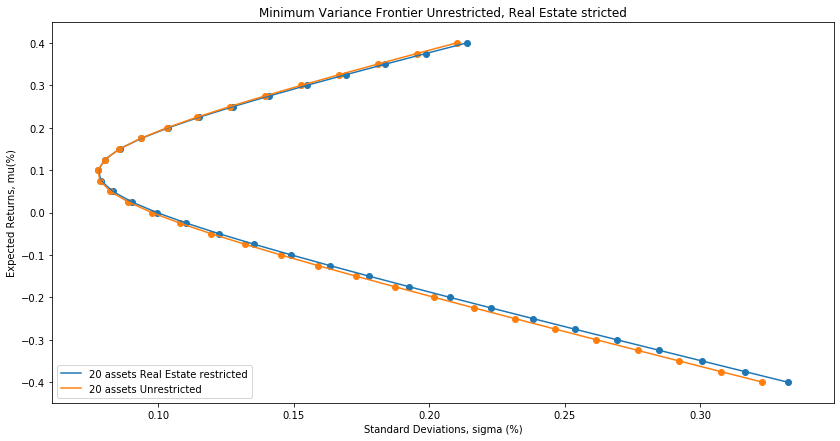

In [0]:
trials = 33
mu_list = np.linspace(-0.4,0.4,num = trials)

sigmaVector = [None]*trials
for i in range(trials):
    mu = mu_list[i]
    sol = solveWeights(bnds,1,annual_returns,annual_cov_matrix,mu_list[i], arr)
    sigmaVector[i] = sol.fun
pt2ssREr = pd.DataFrame(np.sqrt(sigmaVector), index =  mu_list, columns = ["sigma"])
plt.figure(figsize = (14,7))
plt.scatter(pt2ssREr["sigma"],pt2ssREr.index)
plt.plot(pt2ssREr["sigma"], pt2ssREr.index, label = "20 assets Real Estate restricted")
plt.scatter(pt1ssAllowed["sigma"],pt1ssAllowed.index)
plt.plot(pt1ssAllowed["sigma"], pt1ssAllowed.index, label = "20 assets Unrestricted")

plt.legend(loc = 'lower left')
plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted, Real Estate stricted')
plt.show()
plt.close()

Q14
The weights vector are different to that of the short sales allowed in the sense that many stocks with lower mean and higher variance are given 0 weights as they are deemed useless compared to the other stocks.

In [0]:
annual_returns = (returns_weekly.mean())*52
annual_cov_matrix = (returns_weekly.cov())*52 
covq14 = np.asmatrix(annual_cov_matrix)
# short sale not allowed
bnds = ((0,None),)*20
# Target
mu = 0.12

w = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu,0)
weightsq14 = pd.DataFrame(w.x,annual_cov_matrix.index)
weightsq14.columns = ["Weights Short Sales Not Allowed"]
weightsq14df = weightsq14.join(weightsQ3)
weightsq14df.rename(columns = {"Weights" : "Weights Unrestricted"}, inplace = True)
weightsq14df["Diff"] = weightsq14df["Weights Unrestricted"] - weightsq14df["Weights Short Sales Not Allowed"]
print(weightsq14df)

         Weights Short Sales Not Allowed  Weights Unrestricted      Diff
558.SI                      9.144886e-03              0.010130  0.000985
BTJ.SI                      2.710505e-20              0.002241  0.002241
C31.SI                      2.032879e-19             -0.071130 -0.071130
C52.SI                      2.149139e-02              0.042291  0.020800
CC3.SI                      9.248607e-02              0.110870  0.018384
E28.SI                      5.610193e-03              0.011267  0.005657
EB5.SI                      0.000000e+00              0.004224  0.004224
EH5.SI                      8.699172e-02              0.082065 -0.004927
F34.SI                      0.000000e+00              0.011698  0.011698
F99.SI                      4.683570e-03              0.010902  0.006219
G13.SI                      0.000000e+00             -0.021866 -0.021866
H17.SI                      0.000000e+00             -0.003302 -0.003302
H30.SI                      0.000000e+00           

Q15

a)

We wish to achieve the following: Since MVP ignores value of $\mu$


*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on


1.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$

b)



*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on


1.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$
2.   $$\forall i, w_{i} \geq 0 $$

In [0]:
# short sale not allowed
bnds = ((0,None),)*20
w = solveWeights(bnds,0,annual_returns,annual_cov_matrix,999,0)
weightsq15 = pd.DataFrame(w.x,annual_cov_matrix.index)
weightsq15.columns = ["Weights Short Sale Not Allowed"]

In [0]:
sigmaq15 = np.sqrt(np.dot(np.asmatrix(weightsq15).T,np.dot(covq14,np.asmatrix(weightsq15))).item(0,0))
muq15 = np.dot(np.asmatrix(annual_returns),np.asmatrix(weightsq15)).item(0,0)
print("Standard Deviations short sale allowed portfolio", sigma_mvp)
print("Standard Deviation short sale not allowed portfolio", sigmaq15)

Standard Deviations short sale allowed portfolio 0.07762526045133476
Standard Deviation short sale not allowed portfolio 0.07979945912670258


In [0]:
weightsq15df = weightsq15.join(w_mvp)

In [0]:
weightsq15df.rename(columns = {"Weights" : "Weights Unrestricted"}, inplace = True)
print(weightsq15df)

         Weights Short Sale Not Allowed  Weights Unrestricted
558.SI                     0.000000e+00             -0.016275
BTJ.SI                     5.235466e-03              0.007884
C31.SI                     1.280779e-18             -0.054155
C52.SI                     2.295729e-02              0.041503
CC3.SI                     1.353944e-01              0.140567
E28.SI                     5.366809e-19              0.006388
EB5.SI                     6.346295e-20             -0.002828
EH5.SI                     5.654132e-02              0.062201
F34.SI                     2.282376e-02              0.036270
F99.SI                     1.976170e-02              0.021659
G13.SI                     0.000000e+00             -0.003327
H17.SI                     0.000000e+00              0.001967
H30.SI                     0.000000e+00             -0.053352
J69U.SI                    2.085883e-01              0.213972
O39.SI                     0.000000e+00              0.017407
S41.SI  

Q16

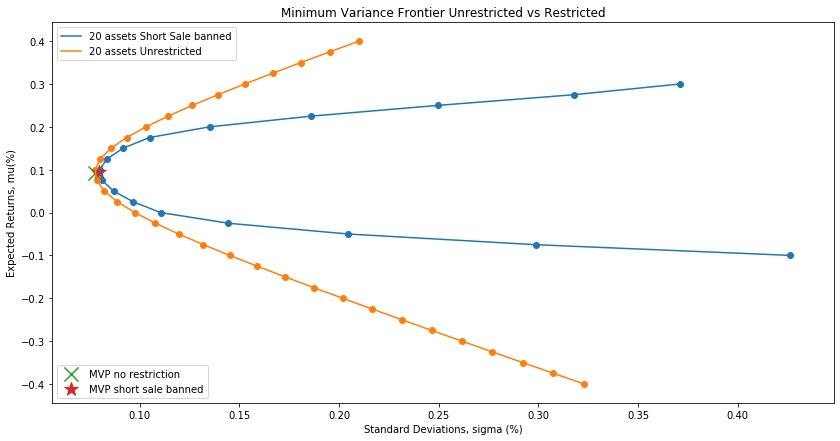

In [0]:
trials = 17
mu_list = np.linspace(-0.1,0.3,num = trials)
annual_returnsq16 = annual_returns.copy()
annual_cov_matrixq16 = annual_cov_matrix.copy()
plot_lines = []
sigmaVector = [None]*trials
for i in range(trials):
    mu = mu_list[i]
    sol = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu_list[i],0)
    sigmaVector[i] = sol.fun
pt2ssNA = pd.DataFrame(np.sqrt(sigmaVector), index =  mu_list, columns = ["sigma"])
plt.figure(figsize = (14,7))
plt.scatter(pt2ssNA["sigma"],pt2ssNA.index)
a1, = plt.plot(pt2ssNA["sigma"], pt2ssNA.index)
plt.scatter(pt1ssAllowed["sigma"],pt1ssAllowed.index)
a2, = plt.plot(pt1ssAllowed["sigma"], pt1ssAllowed.index)

mvpOri = plt.scatter(sigma_mvp,mu_mvp, marker = 'x', s = 200)
mvp15 = plt.scatter(sigmaq15,muq15, marker = '*', s = 200)

plot_lines.append([a1,a2])
b = ["20 assets Short Sale banned", "20 assets Unrestricted"]

MVPlist1 = [mvpOri, mvp15]
MVPlist2 = ["MVP no restriction", "MVP short sale banned"]
legend1 = plt.legend(plot_lines[0],b, loc = 'upper left')
plt.legend(MVPlist1, MVPlist2, loc = 'lower left')
plt.gca().add_artist(legend1)

plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted vs Restricted')
plt.show()
plt.close()

In [0]:
newcol = pd.DataFrame(pt1ssAllowed["sigma"])
newcol2 = pd.DataFrame(pt2ssNA.copy())
newcol.reset_index(level =['mu'], inplace = True)
newcol = newcol[(-0.1 <= newcol["mu"]) & (newcol["mu"] <= 0.301)]
newcol.reset_index(drop = True, inplace = True)
newcol2.reset_index(drop = True,inplace = True)
diff = pd.DataFrame(newcol["mu"])
diff = diff.join(newcol2["sigma"] - newcol["sigma"])

In [0]:
print("Difference between two minimum variance plot")
diff

Difference between two minimum variance plot


,mu,sigma
0,-0.100,0.281270
1,-0.075,0.166544
2,-0.050,0.084781
3,-0.025,0.036607
4,0.000,0.012962
5,0.025,0.007971
6,0.050,0.004697
7,0.075,0.002690
8,0.100,0.002222
9,0.125,0.003416


Q17

Using the bond pricing formula:
$$P = \frac{FV}{(1+r)^{t}}$$
where t is the time till maturity and r is annual returns.

We can calculate the price of the bond as of time 0 and as of 7 days later.

In [0]:
dftBill = dfOtherRates.copy()
dftBill = dftBill["3M Bill Rates"]
dftBill

Date
2009-12-28    0.00542
2010-01-04    0.00550
2010-01-11    0.00571
2010-01-18    0.00529
2010-01-25    0.00491
               ...   
2019-09-02    0.01877
2019-09-09    0.01920
2019-09-16    0.01938
2019-09-23    0.01938
2019-09-30    0.02021
Name: 3M Bill Rates, Length: 510, dtype: float64

In [0]:
# Convert annual yield to price, using the bond pricing formula
# Convert price to weekly holding return
price_prev = 100/(1+dftBill)**(90/360)
price_aft = 100/(1+dftBill)**(83/360)
price_prev = price_prev[:-1]
price_aft = price_aft[1:]

price_prev.reset_index(drop=True, inplace=True)
price_prev.index = price_aft.index

tBill_returns = np.log(price_aft/price_prev)

In [0]:
# Convert weekly holding return to annual return
annual_tBill_returns = (tBill_returns.mean())*52
annual_tBill_std = np.sqrt((tBill_returns.var())*52)
print("TBill returns and std")
print(annual_tBill_returns, annual_tBill_std)

TBill returns and std
0.007237232268656448 0.0010587703276674929


Q18

In [0]:
returns_weeklyq18 = returns_weekly.copy()
returns_weeklyq18.reset_index(drop=True, inplace=True)
tBill_returns.reset_index(drop=True, inplace=True)

returns_weeklyq18 = pd.concat([returns_weeklyq18,tBill_returns], axis = 1)
returns_weeklyq18.rename(columns = {'3M Bill Rates': "3MTBill"}, inplace = True)
returns_weeklyq18.index = returns_weekly.index

In [0]:
annual_returns = (returns_weeklyq18.mean())*52
annual_cov_matrix = (returns_weeklyq18.cov())*52
covq18 = np.asmatrix(annual_cov_matrix)
annual_std_df = pd.DataFrame(np.sqrt(np.diagonal(np.asmatrix(annual_cov_matrix))),
                          annual_cov_matrix.columns)

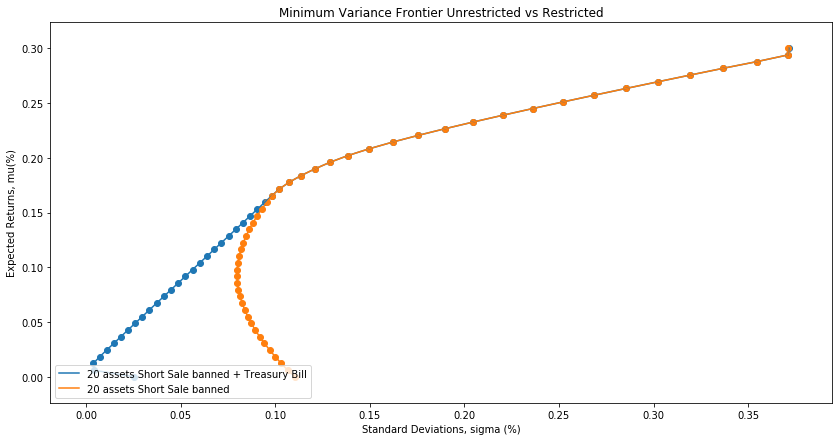

In [0]:
# short sale not allowed
bnds = ((0,None),)*21

trials = 50
mu_list = np.linspace(0.0,0.3,num = trials)

bnds2 = ((0,None),)*20
sigmaVector = [None]*trials
for i in range(trials):
    mu = mu_list[i]
    sol = solveWeights(bnds2,0,annual_returnsq16,annual_cov_matrixq16,mu_list[i],0)
    sigmaVector[i] = sol.fun
pt2ssNA = pd.DataFrame(np.sqrt(sigmaVector), index =  mu_list, columns = ["sigma"])

sigmaVector = [None]*trials
for i in range(trials):
    mu = mu_list[i]
    sol = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu_list[i],0)
    sigmaVector[i] = sol.fun
pt3ssNATB = pd.DataFrame(np.sqrt(sigmaVector), index =  mu_list, columns = ["sigma"])


plt.figure(figsize = (14,7))
plt.scatter(pt3ssNATB["sigma"],pt3ssNATB.index)
plt.plot(pt3ssNATB["sigma"], pt3ssNATB.index, label = "20 assets Short Sale banned + Treasury Bill")
plt.scatter(pt2ssNA["sigma"],pt2ssNA.index)
plt.plot(pt2ssNA["sigma"], pt2ssNA.index, label = "20 assets Short Sale banned")

plt.legend(loc = 'lower left')
plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted vs Restricted')
plt.show()
plt.close()

Q19

We can see that compositions of weights are essentially identical, mainly compose of the high returns stocks. Treasury Bill did not make a difference

In [0]:
# short sale not allowed
bnds = ((0,None),)*21
# Target
mu = 0.12

w = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu,0)
weightsq19 = pd.DataFrame(w.x,annual_cov_matrix.index)
weightsq19.columns = ["Weights incl Tbill"]

In [0]:
# Computing standard deviations
sigmaWithTBill = np.sqrt(np.dot(np.asmatrix(weightsq19).T,np.dot(covq18,np.asmatrix(weightsq19))).item(0,0))
sigmaWithoutTBill = np.sqrt(np.dot(np.asmatrix(weightsq14).T,np.dot(covq14,np.asmatrix(weightsq14))).item(0,0))
print("Sigma With TBill",sigmaWithTBill)
print("Sigma Without TBill", sigmaWithoutTBill)

Sigma With TBill 0.07004280031333383
Sigma Without TBill 0.08255206603564982


In [0]:
weightsq19df = weightsq19.join(weightsq14)

In [0]:
print("Weights q19")
print(weightsq19df)

Weights q19
         Weights incl Tbill  Weights Short Sales Not Allowed
558.SI         5.822772e-02                     9.144886e-03
BTJ.SI         1.436568e-18                     2.710505e-20
C31.SI         4.770490e-18                     2.032879e-19
C52.SI         0.000000e+00                     2.149139e-02
CC3.SI         7.589415e-19                     9.248607e-02
E28.SI         1.870718e-03                     5.610193e-03
EB5.SI         0.000000e+00                     0.000000e+00
EH5.SI         9.725596e-02                     8.699172e-02
F34.SI         0.000000e+00                     0.000000e+00
F99.SI         0.000000e+00                     4.683570e-03
G13.SI         0.000000e+00                     0.000000e+00
H17.SI         1.843144e-18                     0.000000e+00
H30.SI         0.000000e+00                     0.000000e+00
J69U.SI        1.777005e-01                     2.353470e-01
O39.SI         1.138412e-18                     0.000000e+00
S41.SI      

Q20

We wish to achieve the following: Since MVP ignores value of $\mu$


*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on


1.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$
2.   $$\forall i, w_{i} \geq 0 $$
3.   $$ w_{\text{T Bill}}  = 0 $$

In [0]:
# short sale not allowed
bnds = ((0,None),)*21
w = solveWeights(bnds,0,annual_returns,annual_cov_matrix,999,0)
weightsq20b = pd.DataFrame(w.x,annual_cov_matrix.index)
weightsq20b.columns = ["Weights No Short Sale with TBill"]
sigmaq20b = np.sqrt(np.dot(np.asmatrix(weightsq20b).T,np.dot(covq18,np.asmatrix(weightsq20b))).item(0,0))
muq20b = np.dot(np.asmatrix(annual_returns),np.asmatrix(weightsq20b)).item(0,0)
print("20 shares + Tbill No short sale vs 20 shares No short sale")
print("Mu", muq20b, muq15)
print("Std",sigmaq20b, sigmaq15)

weightsq20bdf = weightsq20b.join(weightsq15)
print("Weights q20")
print(weightsq20bdf)

20 shares + Tbill No short sale vs 20 shares No short sale
Mu 0.007451008873382281 0.09393496963383968
Std 0.001092211736822252 0.07979945912670258
Weights q20
         Weights No Short Sale with TBill  Weights Short Sale Not Allowed
558.SI                       9.612455e-05                    0.000000e+00
BTJ.SI                       7.850998e-07                    5.235466e-03
C31.SI                       0.000000e+00                    1.280779e-18
C52.SI                       4.336809e-19                    2.295729e-02
CC3.SI                       0.000000e+00                    1.353944e-01
E28.SI                       0.000000e+00                    5.366809e-19
EB5.SI                       0.000000e+00                    6.346295e-20
EH5.SI                       3.110640e-04                    5.654132e-02
F34.SI                       1.948176e-20                    2.282376e-02
F99.SI                       0.000000e+00                    1.976170e-02
G13.SI                    

Q21

We wish to achieve the following:


*   minimise $$\frac{1}{2}\boldsymbol{w}^{T}\Sigma \boldsymbol{w}$$
*   constraint on

1.   $$\boldsymbol{w}^{T}\boldsymbol{z} = \mu$$
2.   $$\boldsymbol{w}^{T}\boldsymbol{1} = 1$$
3.   $$\forall i, w_{i} \geq 0 $$
4.   $$ w_{\text{T Bill}}  = 0 $$

In [0]:
returns_weeklyq21 = returns_weeklyq9.copy()
returns_weeklyq21.reset_index(drop=True, inplace=True)
tBill_returns.reset_index(drop=True, inplace=True)
returns_weeklyq21 = pd.concat([returns_weeklyq21,tBill_returns], axis = 1)
returns_weeklyq21.rename(columns = {'3M Bill Rates': "3MTBill"}, inplace = True)
returns_weeklyq21.index = returns_weekly.index

In [0]:
annual_returns = (returns_weeklyq21.mean())*52
annual_cov_matrix = (returns_weeklyq21.cov())*52
covq21 = np.asmatrix(annual_cov_matrix)
annual_std_df = pd.DataFrame(np.sqrt(np.diagonal(np.asmatrix(annual_cov_matrix))),
                          annual_cov_matrix.columns)

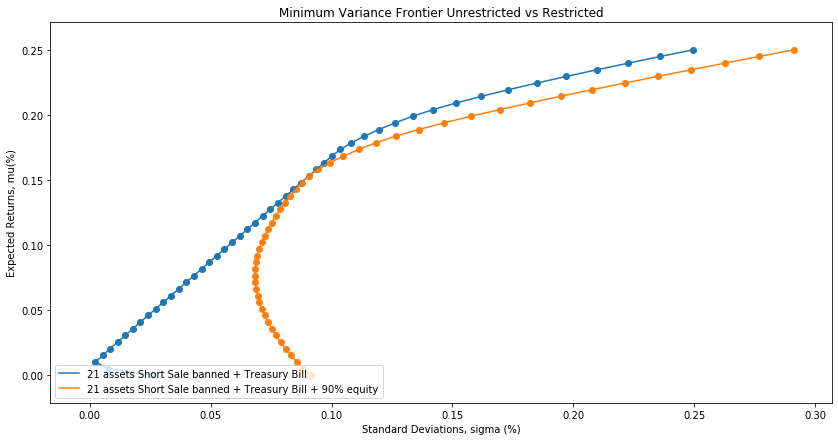

In [0]:
# short sale not allowed
bnds = ((0,None),)*22

trials = 50
mu_list = np.linspace(-0.0,0.25,num = trials)

sigmaVector = [None]*trials
for i in range(trials):
    mu = mu_list[i]
    sol = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu_list[i],0)
    sigmaVector[i] = sol.fun
pt4ssNAallTB = pd.DataFrame(np.sqrt(sigmaVector), index =  mu_list, columns = ["sigma"])

# short sale not allowed and added constraints to treasury bills
bnds = ((0,None),)*21 + ((0.1,0.1),)*1

trials = 50
mu_list = np.linspace(-0.0,0.25,num = trials)

sigmaVector = [None]*trials
for i in range(trials):
    mu = mu_list[i]
    sol = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu_list[i],0)
    sigmaVector[i] = sol.fun
pt4ssNAallTBconst = pd.DataFrame(np.sqrt(sigmaVector), index =  mu_list, columns = ["sigma"])

plt.figure(figsize = (14,7))
plt.scatter(pt4ssNAallTB["sigma"],pt4ssNAallTB.index)
plt.plot(pt4ssNAallTB["sigma"], pt4ssNAallTB.index, label = "21 assets Short Sale banned + Treasury Bill")
plt.scatter(pt4ssNAallTBconst["sigma"],pt4ssNAallTBconst.index)
plt.plot(pt4ssNAallTBconst["sigma"], pt4ssNAallTBconst.index, label = "21 assets Short Sale banned + Treasury Bill + 90% equity")

plt.legend(loc = 'lower left')
plt.ylabel('Expected Returns, mu(%)')
plt.xlabel('Standard Deviations, sigma (%)')
plt.title('Minimum Variance Frontier Unrestricted vs Restricted')
plt.show()
plt.close()

Q22

In [0]:
# short sale not allowed
bnds = ((0,None),)*22
# Target
mu = 0.12

wa = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu,0)
weightsq22a = pd.DataFrame(wa.x,annual_cov_matrix.index)
weightsq22a.columns = ["Weights All Stocks + Treasury Bill"]

# short sale not allowed
bnds = ((0,None),)*21 + ((0.1,0.1),)*1
# Target
mu = 0.12

wb = solveWeights(bnds,0,annual_returns,annual_cov_matrix,mu,0)
weightsq22b = pd.DataFrame(wb.x,annual_cov_matrix.index)
weightsq22b.columns = ["Weights All Stocks + Treasury Bill + 90% equity"]

In [0]:
weightsq22bdf = weightsq22b.join(weightsq22a)

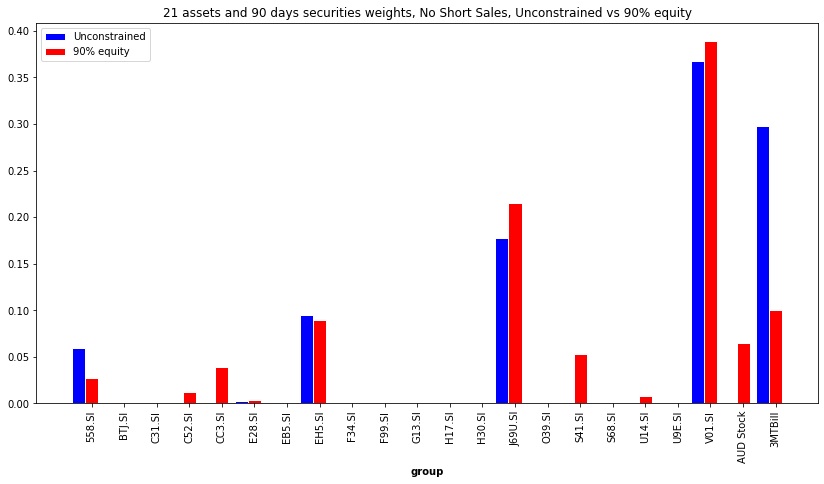

In [0]:
# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = weightsq22bdf["Weights All Stocks + Treasury Bill"]
bars2 = weightsq22bdf["Weights All Stocks + Treasury Bill + 90% equity"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.figure(figsize = (14,7))
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label="Unconstrained")
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label= "90% equity")
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],weightsq22bdf.index, rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.title('21 assets and 90 days securities weights, No Short Sales, Unconstrained vs 90% equity')
plt.show()
plt.close()